# Geochemistry: Automated ML Clustering 

## w/ PyCaret

## Configuration

### Load custom geochemistry dataframe w/ PyCaret support

In [1]:
import sys, os 
sys.path.append("..")

from minalyze import GeochemML

### Read sample geochemistry data from csv

In [2]:
filepath = '../data/OOLDEA2_1m_intervals.csv'
this = GeochemML.read_csv( filepath )

## Setup this

In [3]:
this.prepare( silent=True )

,Description,Value
0,session_id,123
1,Original Data,"(156, 99)"
2,Missing Values,False
3,Numeric Features,29
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(156, 29)"
9,CPU Jobs,-1


### List available cluster models 

In [4]:
this.listmodels()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


## Create a model

### Train a cluster model or array of models (e.g. automl)

In [5]:
# Add optional model configuration.
this.modelopts = dict( num_clusters = 3 )

In [6]:
this.create()

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0591,2.6565,5.16,0,0,0


### Assign labels

In [7]:
this.label()

In [8]:
this.modelopts

{'num_clusters': 3}

### Cluster labels are appended to the end of the dataframe

In [9]:
this.data

,id,result_master_id,DDH_name,from_m,to_m,Sample_Length_m,Scan_Length_m,Scan_Recovery_pct,Comp(c/s),Rayl(c/s),...,Ce_mdl_ppm,Pb_pct,Pb_2SE_pct,Pb_mdl_pct,U_ppm,U_2SE_ppm,U_mdl_ppm,minaloggerlink,kmeans_Cluster,kmodes_Cluster
0,69232,38,OOLDEA2,13,14,1,0.2401,24.01,2613.187,715.3073,...,40.99,0.0029,0.0017,0.0025,22.97,15.03,20.40,https://minalogger.com/viewer/?project=WESTERN...,Cluster 0,Cluster 0
1,69233,38,OOLDEA2,14,15,1,0.4056,40.56,2498.827,653.7424,...,36.78,0.0030,0.0014,0.0021,20.18,12.16,16.75,https://minalogger.com/viewer/?project=WESTERN...,Cluster 0,Cluster 0
2,69234,38,OOLDEA2,15,16,1,0.6329,63.29,2869.263,702.2439,...,30.90,0.0032,0.0012,0.0019,31.67,10.89,14.70,https://minalogger.com/viewer/?project=WESTERN...,Cluster 0,Cluster 0
3,69235,38,OOLDEA2,16,17,1,0.6143,61.43,2594.439,641.5786,...,24.85,0.0036,0.0010,0.0015,24.23,9.12,12.22,https://minalogger.com/viewer/?project=WESTERN...,Cluster 0,Cluster 0
4,69236,38,OOLDEA2,17,18,1,0.4486,44.86,2578.841,647.0553,...,26.67,0.0039,0.0011,0.0016,22.88,10.39,13.37,https://minalogger.com/viewer/?project=WESTERN...,Cluster 0,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,69383,38,OOLDEA2,164,165,1,0.9415,94.15,1656.487,520.2108,...,23.80,0.0000,0.0011,0.0017,20.35,9.04,12.86,https://minalogger.com/viewer/?project=WESTERN...,Cluster 2,Cluster 0
152,69384,38,OOLDEA2,165,166,1,0.8726,87.26,1544.148,524.4318,...,25.67,0.0000,0.0000,0.0000,19.08,9.80,14.40,https://minalogger.com/viewer/?project=WESTERN...,Cluster 2,Cluster 0
153,69385,38,OOLDEA2,166,167,1,0.7751,77.51,1957.022,561.2939,...,26.52,0.0000,0.0013,0.0019,32.09,10.72,15.23,https://minalogger.com/viewer/?project=WESTERN...,Cluster 2,Cluster 0
154,69386,38,OOLDEA2,167,168,1,0.8018,80.18,1702.285,545.7176,...,27.18,0.0000,0.0013,0.0019,21.36,10.30,15.11,https://minalogger.com/viewer/?project=WESTERN...,Cluster 2,Cluster 1


## Visualize/Explore models  

### Cluster PCA Plot (2d)  

In [10]:
this.active = 0

In [11]:
this.plottype = "cluster"
this.plotmodel()

### Cluster TSnE (3d)

In [12]:
this.plottype = "tsne"
#this.plotmodel()

### Elbow Plot

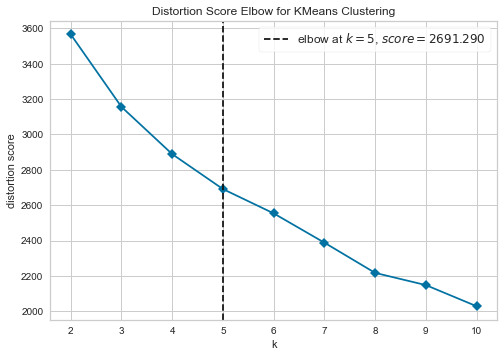

In [13]:
this.plottype = "elbow"
this.plotmodel()

### Distance Plot

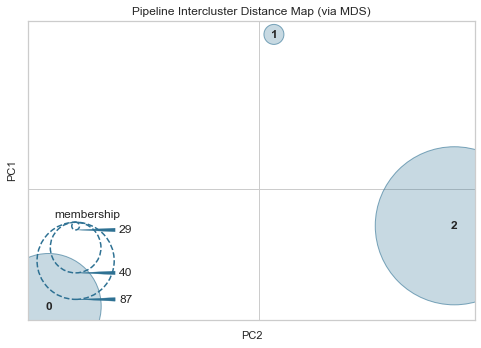

In [14]:
this.plottype = "distance"
this.plotmodel()

### Distribution Plot

In [15]:
this.plottype = "distribution"
this.plotmodel()

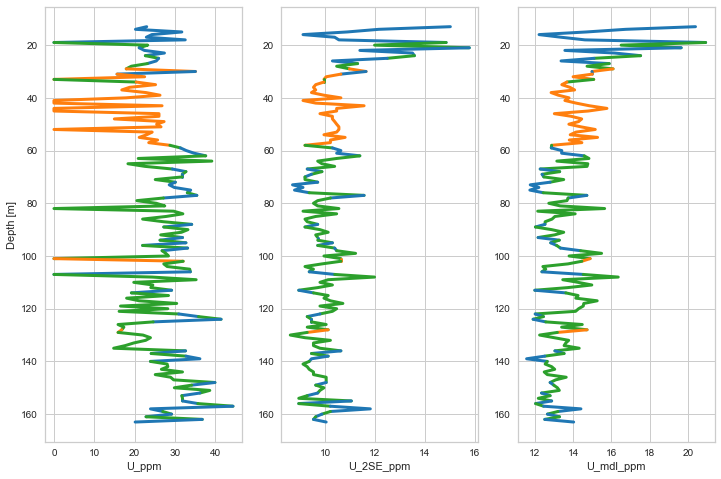

In [18]:
this.preview( "U", labels=True )

In [17]:
this.savefig()

# Debugging / prototyping